# Data Mining - Naive Bayes

**Authors:** [Melissa Perez](https://github.com/MelissaPerez09), [Adrian Flores](https://github.com/adrianRFlores), [Andrea Ramirez](https://github.com/Andrea-gt)

**Description:** 

## Import Libraries ⬇️

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score,
precision_score, recall_score, ConfusionMatrixDisplay)
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

random_state = 42

## Data Upload 📄

In [2]:
df = pd.read_csv('data/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Exploratory Analysis 🔎

### Variable Categorization

#### **Numerical**

`Continuous`: LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice

`Discrete`: Id, MSSubClass, Overa

#### **Categorical**
`Nominal`: MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Electrical, GarageType, MiscFeature, SaleType, SaleCondition

`Ordinal`: ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence

### Descriptive Statistics

In [3]:
df_describe = df.loc[:, df.columns != 'Id']
df_describe.describe(include=[np.number])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


En el análisis descriptivo de la variable objetivo, SalePrice, observamos que su distribución cuartílica revela puntos clave en la distribución de precios de venta. El primer cuartil (Q1), que representa el 25% inferior de los datos, se sitúa en 129,975. Esto indica que el 25% de las viviendas se vendieron a un precio igual o inferior a esta cifra. El segundo cuartil (Q2), o mediana, se encuentra en 163,000, lo que significa que la mitad de las viviendas se vendieron a un precio igual o inferior a este valor. Por último, el tercer cuartil (Q3), que abarca el 75% de los datos, se encuentra en 214,000, indicando que el 75% de las viviendas se vendieron a precios iguales o inferiores a este monto. A continuación, se presentan dos gráficos para ilustrar mejor la distribución de estos cuartiles en la variable SalePrice.

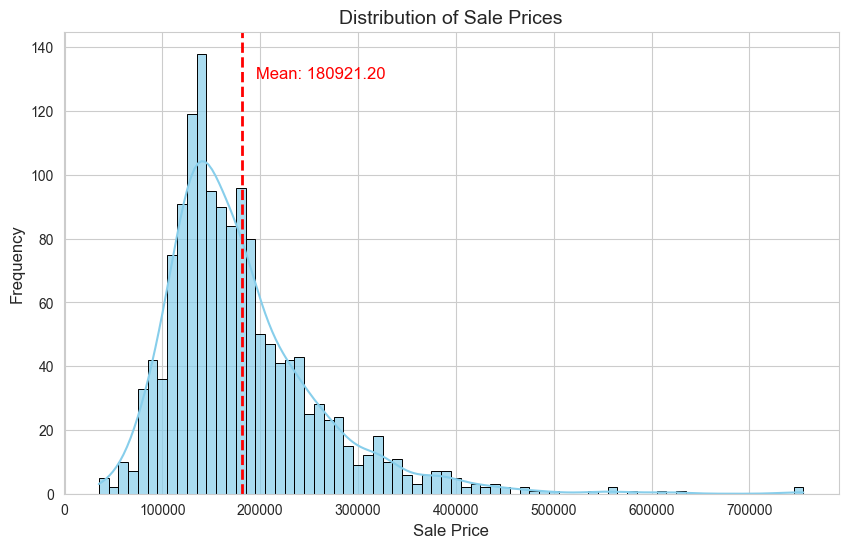

In [4]:
sns.set_style("whitegrid")

# Creating a new figure with specified size
plt.figure(figsize=(10, 6))

# Plotting the histogram of 'SalePrice' column from DataFrame 'df'
sns.histplot(x='SalePrice', data=df, kde=True, color='skyblue', binwidth=10000, alpha=0.7, edgecolor='black')

# Plot settings
plt.title('Distribution of Sale Prices', fontsize=14, fontweight='500')
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Calculating the mean of 'SalePrice' column
mean_value = df['SalePrice'].mean()

# Adding a vertical line representing the mean value
plt.axvline(mean_value, color='r', linestyle='--', linewidth=2)

# Adding text annotation for the mean value
plt.text(mean_value, plt.ylim()[1]*0.9, '   Mean: {:.2f}'.format(mean_value), color='r', fontsize=12)

plt.show()

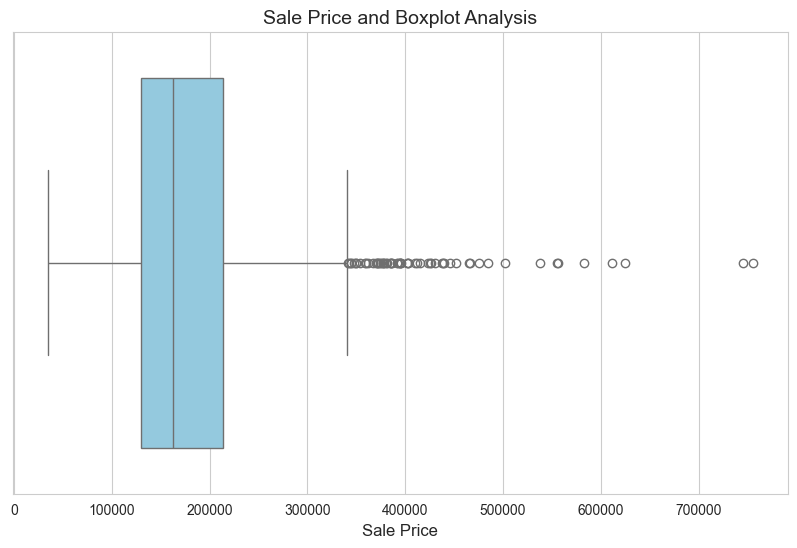

In [5]:
sns.set_style("whitegrid")

# Creating a new figure with specified size
plt.figure(figsize=(10, 6))

# Plotting the boxplot of 'SalePrice' column from DataFrame 'df'
sns.boxplot(x='SalePrice', data=df, color='skyblue')

# Plot settings
plt.title('Sale Price and Boxplot Analysis', fontsize=14, fontweight='500')
plt.xlabel('Sale Price', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### NaN Value Analysis

In [6]:
# Checking for columns with missing values
nullValues = df.isnull().sum()

# Selecting columns with missing values
nullValues = nullValues[nullValues > 0]

# Printing information for any columns with missing values
if not nullValues.empty:
    print("Columns with NaN values:")
    print("-" * 40)
    for column, nans in nullValues.items():
        print(f"{column: <30} | {nans: >5} missing values")
    print("-" * 40)
else:
    print("No columns with NaN values found.")

Columns with NaN values:
----------------------------------------
LotFrontage                    |   259 missing values
Alley                          |  1369 missing values
MasVnrType                     |   872 missing values
MasVnrArea                     |     8 missing values
BsmtQual                       |    37 missing values
BsmtCond                       |    37 missing values
BsmtExposure                   |    38 missing values
BsmtFinType1                   |    37 missing values
BsmtFinType2                   |    38 missing values
Electrical                     |     1 missing values
FireplaceQu                    |   690 missing values
GarageType                     |    81 missing values
GarageYrBlt                    |    81 missing values
GarageFinish                   |    81 missing values
GarageQual                     |    81 missing values
GarageCond                     |    81 missing values
PoolQC                         |  1453 missing values
Fence           

## Data Preprocessing 🗂️

### Handling Missing Values

In [7]:
# Remove rows with missing values in 'MasVnrType', 'MasVnrArea', and 'Electrical' columns.
df.dropna(subset=['MasVnrType', 'MasVnrArea', 'Electrical'], inplace=True)

In [8]:
# Impute missing LotFrontage values based on the median LotFrontage within each neighborhood.
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [9]:
# Fill missing values in FireplaceQu with 'None'.
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [10]:
# Fill missing values in garage-related variables with 'None'.
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')

In [11]:
# Fill missing values in basement-related variables with 'None'.
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')

In [12]:
# Drop columns with a high count of missing values
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

### Encoding

In [13]:
# Columns to encode, separated by feature category
nominalFeatures = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                    'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType',
                    'SaleCondition','PavedDrive']

ordinalFeatures = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual','FireplaceQu',
                    'GarageQual', 'GarageCond']

otherOrdinalFeatures = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageFinish']

In [14]:
# Convert nominal features into dummy variables
df = pd.get_dummies(df, columns=nominalFeatures)

In [15]:
# Define ordinal categories for each ordinal feature
ordinalCategories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'] for _ in ordinalFeatures]

# Create an ordinal encoder
ordinalEncoder = OrdinalEncoder(categories=ordinalCategories)

# Fit and transform ordinal features
ordinalEncoded = ordinalEncoder.fit_transform(df[ordinalFeatures])

# Update dataframe with ordinal encoded features
for i, feature in enumerate(ordinalFeatures):
    df[feature] = ordinalEncoded[:, i]

In [16]:
# Define encoding categories for each other ordinal feature
encodingCategories = [
    ['None', 'No', 'Mn', 'Av', 'Gd'],  # BsmtExposure
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType1
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType2
    ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],  # Functional
    ['None', 'Unf', 'RFn', 'Fin']  # GarageFinish
]

# Create an ordinal encoder
ordinalEncoder = OrdinalEncoder(categories=encodingCategories)

# Fit and transform other ordinal features
ordinalEncoded = ordinalEncoder.fit_transform(df[otherOrdinalFeatures])

# Update dataframe with ordinal encoded features
for i, feature in enumerate(otherOrdinalFeatures):
    df[feature] = ordinalEncoded[:, i]

### Splitting DataSet

In [17]:
# Create a copy of the dataframe
df_cp = df.copy()

# Separate target variable 'SalePrice' from features
y = df_cp.pop('SalePrice')
X = df_cp

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=random_state)

In [19]:
print(X_train.shape)
print(X_test.shape)

(470, 191)
(118, 191)
